# Hierarical Clustring (Agglomerative-single Linkage)
### Importing packages

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## Reading the dateset & Renaming columns lables

In [51]:
col_names = ['timeStamp', 'Gender', 'Grade', 'Age', 'Length', 'Weight', 'ShoesSize']
dataframe = pd.read_csv("../human_features.csv", names = col_names, skiprows=(0, ))

In [91]:
dataFrameWithConcernedFeatures = dataframe.loc[:, ['Age', 'Length']]

## Visualizing the data

In [94]:
x = dataFrameWithConcernedFeatures.iloc[:, 0]
y = dataFrameWithConcernedFeatures.iloc[:, 1]

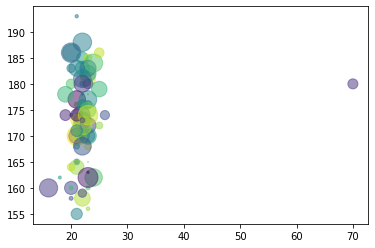

In [99]:
n = dataFrameWithConcernedFeatures.shape[0]
colors = np.random.rand(n)
size = pow(20 * np.random.rand(n), 2)
plt.scatter(x, y, s=size, c=colors, alpha=0.5)

##  Filtering out odd date

In [97]:
dataFrameFiltered = dataFrameWithConcernedFeatures.loc[dataframe["Age"] <= 40, ["Age", "Length"]]

## Data after removing odd samples

In [103]:
x = dataFrameFiltered.loc[:, 'Age']
y = dataFrameFiltered.loc[:, 'Length']

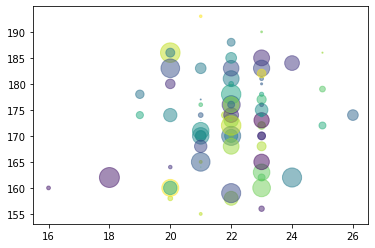

In [104]:
n = dataFrameFiltered.shape[0]
colors = np.random.rand(n)
size = pow(20 * np.random.rand(n), 2)
plt.scatter(x, y, s=size, c=colors, alpha=0.5)

## Creating Agglomerative Clusting model

In [105]:
cluster_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

### Training the model on the data

In [108]:
clustring = cluster_model.fit(dataFrameFiltered)

# Needs Explaination

In [107]:
clustring.labels_

array([62, 67, 75, 74, 73, 61, 72, 65, 71, 49, 59, 69, 68, 63, 58, 48, 45,
       35, 47, 56, 39, 53, 43, 40, 55, 66, 27, 50, 51, 57, 24, 46, 70, 33,
       52, 25, 60, 44, 28, 32, 36, 21, 19, 54, 29, 64, 30, 14, 23, 37, 13,
       22, 31, 34, 42, 17, 41, 26, 20,  6, 15, 16, 38, 18, 11,  9,  8, 10,
        7,  4,  3, 12,  5,  1,  2,  0])

In [109]:
clustring.children_

array([[  2,  39],
       [  3,  73],
       [  4,  41],
       [  6,  20],
       [  8,  59],
       [ 32,  74],
       [ 11,  31],
       [ 12,  15],
       [ 33,  83],
       [ 70,  75],
       [ 25,  79],
       [ 52,  82],
       [ 13,  22],
       [  0,  26],
       [  5,   9],
       [ 36,  37],
       [ 10,  42],
       [ 14,  44],
       [ 29,  34],
       [ 19,  23],
       [ 24,  61],
       [ 57,  63],
       [ 21,  62],
       [ 35,  68],
       [ 28,  46],
       [ 27,  58],
       [ 30,  54],
       [ 48,  50],
       [ 18,  81],
       [ 69,  86],
       [ 51,  96],
       [ 77,  88],
       [ 78,  84],
       [ 98, 107],
       [ 90, 104],
       [ 76,  97],
       [ 87, 101],
       [ 66, 112],
       [ 49,  92],
       [ 40, 102],
       [ 55,  94],
       [ 53,  95],
       [  1,  17],
       [  7,  16],
       [ 45,  56],
       [ 99, 100],
       [ 47,  64],
       [ 38,  85],
       [ 93, 113],
       [ 43,  65],
       [ 71, 111],
       [ 72, 116],
       [109,

In [21]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

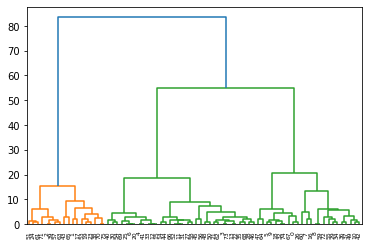

In [116]:
plot_dendrogram(clustring)

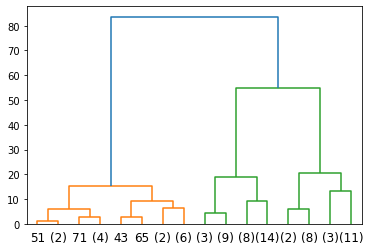

In [117]:
plot_dendrogram(clustring, truncate_mode="level", p=3 )